In [5]:
import groundmeas as gm
import json
import os

# Path to the JSON file
path_dir = "measurements/"

gm.connect_db("new.db")

# iterate over all json files which end with _measurement.json
# and create a measurement in the database

all_files = os.listdir(path_dir)

all_measurements_files = [f for f in all_files if f.endswith("_measurement.json")]
all_items_files = [f for f in all_files if f.endswith("_items.json")]

for measurement_file in all_measurements_files:
    # read the json file
    with open(path_dir + measurement_file, "r") as f:
        data = json.load(f)
        # create a measurement in the database
        mid = gm.create_measurement(data)
       
        # get the items file name
        items_file = measurement_file.replace("_measurement.json", "_items.json")
        # check if the items file exists
        if items_file in all_items_files:
            # read the items file
            with open(path_dir + items_file, "r") as f:
                items_data = json.load(f)
                # create the items in the database
                for item in items_data.get("items", []):
                
                    iid = gm.create_item(item, mid)
                    print(f"Created item {iid} for measurement {mid}")
        else:
            print(f"Items file {items_file} not found for measurement {measurement_file}")






Created item 1 for measurement 1
Created item 2 for measurement 1
Created item 3 for measurement 1
Created item 4 for measurement 1
Created item 5 for measurement 1
Created item 6 for measurement 1
Created item 7 for measurement 2
Created item 8 for measurement 2
Created item 9 for measurement 2
Created item 10 for measurement 2
Created item 11 for measurement 2
Created item 12 for measurement 2
Created item 13 for measurement 2
Created item 14 for measurement 2
Created item 15 for measurement 2
Created item 16 for measurement 2
Created item 17 for measurement 2
Created item 18 for measurement 2
Created item 19 for measurement 2
Created item 20 for measurement 3
Created item 21 for measurement 3
Created item 22 for measurement 3
Created item 23 for measurement 3
Created item 24 for measurement 3
Created item 25 for measurement 3
Created item 26 for measurement 3
Created item 27 for measurement 3
Created item 28 for measurement 3
Created item 29 for measurement 3
Created item 30 for mea

In [9]:
import pandas as pd

out, mid = gm.read_measurements_by(voltage_level_kv__gte=10)

out_items, _ = gm.read_items_by(
    measurement_id__in=mid,
    measurement_type="earthing_impedance"
)

df = pd.DataFrame(out_items)

df.head(30)


,id,value,value_imag,unit,frequency_hz,input_impedance_ohm,measurement_id,value_real,measurement_type,value_angle_deg,description,additional_resistance_ohm,measurement_distance_m
0,1,7.100,NaN,Ohm,50.0,500000.0,1,NaN,earthing_impedance,NaN,None,0.0,20.0
1,2,7.300,NaN,Ohm,15.0,500000.0,1,NaN,earthing_impedance,NaN,None,0.0,20.0
2,3,6.900,NaN,Ohm,100.0,500000.0,1,NaN,earthing_impedance,NaN,None,0.0,20.0
3,7,0.280,NaN,Ohm,50.0,500000.0,2,NaN,earthing_impedance,NaN,None,0.0,140.0
4,8,0.130,NaN,Ohm,15.0,500000.0,2,NaN,earthing_impedance,NaN,None,0.0,140.0
5,9,0.500,NaN,Ohm,100.0,500000.0,2,NaN,earthing_impedance,NaN,None,0.0,140.0
6,10,0.700,NaN,Ohm,150.0,500000.0,2,NaN,earthing_impedance,NaN,None,0.0,140.0
7,11,0.890,NaN,Ohm,200.0,500000.0,2,NaN,earthing_impedance,NaN,None,0.0,140.0
8,12,1.070,NaN,Ohm,250.0,500000.0,2,NaN,earthing_impedance,NaN,None,0.0,140.0
9,20,0.320,NaN,Ohm,50.0,500000.0,3,NaN,earthing_impedance,NaN,None,0.0,75.0


In [3]:
from groundmeas.analytics import impedance_over_frequency

impedance_over_frequency(mid)

{1: {50.0: 7.1, 15.0: 7.3, 100.0: 6.9},
 2: {50.0: 0.28, 15.0: 0.13, 100.0: 0.5, 150.0: 0.7, 200.0: 0.89, 250.0: 1.07},
 3: {50.0: 0.32,
  15.0: 0.14,
  100.0: 0.58,
  150.0: 0.84,
  200.0: 1.08,
  250.0: 1.33},
 4: {15.0: 0.344,
  50.0: 0.46,
  100.0: 0.63,
  150.0: 0.79,
  200.0: 0.95,
  250.0: 1.1,
  350.0: 1.34},
 5: {50.0: 0.23,
  15.0: 0.17,
  100.0: 0.334,
  150.0: 0.443,
  200.0: 0.542,
  250.0: 0.657,
  300.0: 0.762,
  350.0: 0.86},
 6: {15.0: 0.17,
  50.0: 0.26,
  100.0: 0.43,
  150.0: 0.6,
  200.0: 0.76,
  250.0: 0.84,
  350.0: 1.18}}

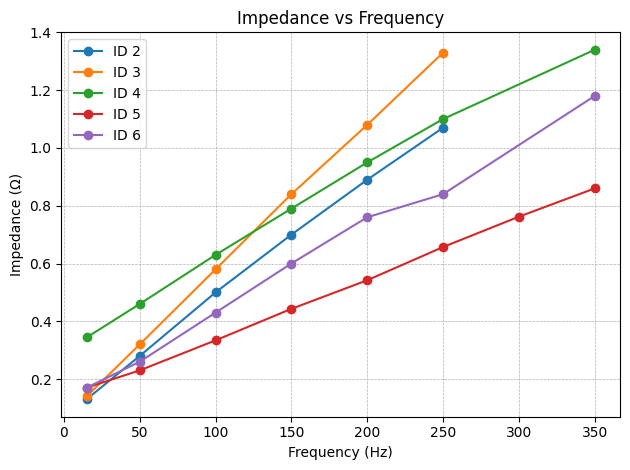

In [4]:
from groundmeas.plots import plot_imp_over_f

plot_imp_over_f([mid[1], mid[2], mid[3], mid[4], mid[5]], normalize_freq_hz=None);